## Introduction to Huggingface __transformers__ library
* The transformers library is an open-source, community-based repository to train, use and share models based on the Transformer architecture such as 
  * Bert
  * Distilbert
  * GPT2
  * XLNet

* Along with the models, the library contains multiple variations of each of them for a large variety of downstream-tasks like 

  * Named Entity Recognition (NER)

  * Classification Tasks (like Text Classification, Sentiment Analysis )

  * Language Modeling

  * Question Answering.

* The transformers library allows you to benefits from large, pretrained language models without requiring a huge and costly computational infrastructure. 

*  The Model Hub contains thousands of pretrained models that anyone can download and use. You can also upload your own models to the Hub!

__Reference:__ https://huggingface.co/course/chapter1/3?fw=pt


# What is `BERT`

__Bidirectional Encoder Representations from Transformers (BERT)__ is a technique for NLP (Natural Language Processing) pre-training developed by Google. BERT was created and published in 2018 by Jacob Devlin and his colleagues from Google. Google is leveraging BERT to better understand user searches.

BERT is designed to pretrain deep bidirectional representations from
unlabeled text by jointly conditioning on both
left and right context in all layers. As a result, the pre-trained BERT model can be finetuned with just one additional output layer
to create state-of-the-art models for a wide
range of tasks, such as question answering and
language inference, without substantial task specific architecture modifications.

## Additional Reading:

* Video Lecture: BERT NLP Tutorial 1- Introduction | BERT Machine Learning | KGP Talkie

https://www.youtube.com/watch?v=h_U27jBNYI4

* Ref BERT:  **Pre-training of Deep Bidirectional Transformers for
Language Understanding**

https://arxiv.org/abs/1810.04805

* Understanding searches better than ever before:

https://www.blog.google/products/search/search-language-understanding-bert/

* Good Resource to Read More About the BERT: 

http://jalammar.github.io/illustrated-bert/

* Visual Guide to Using BERT:
 
http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as name
import cv2
img=cv2.imread("/content/gdrive/My Drive/NLP/Deep_Learning_Models/img/Companies.PNG")

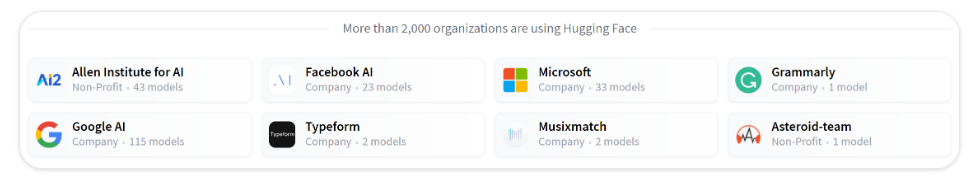

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

# Getting started with transformers

## 1. Install HuggingFace transformers library

In [ ]:
# The Hugging Face Hub is a platform with over 50K models, 5K datasets, and 5K demos in which people can easily collaborate for their ML workflows.
# https://huggingface.co/docs/hub/index

# Leverage 20,000+ Transformer models. The Model Hub contains thousands of pretrained models that anyone can download and use.

!pip install datasets transformers huggingface_hub
!apt-get install git-lfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 8.0 MB/s 
     |████████████████████████████████| 4.2 MB 62.8 MB/s 
     |████████████████████████████████| 86 kB 2.8 MB/s 
     |████████████████████████████████| 1.1 MB 50.0 MB/s 
     |████████████████████████████████| 212 kB 65.5 MB/s 
     |████████████████████████████████| 140 kB 50.5 MB/s 
     |████████████████████████████████| 596 kB 61.5 MB/s 
     |████████████████████████████████| 127 kB 58.1 MB/s 
     |████████████████████████████████| 6.6 MB 65.7 MB/s 
     |████████████████████████████████| 271 kB 70.8 MB/s 
     |████████████████████████████████| 94 kB 3.9 MB/s 
     |████████████████████████████████| 144 kB 56.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing i

## 2. Preprocess Data

In [ ]:
# Load data
from datasets import load_dataset
imdb = load_dataset("imdb")

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# Create a smaller training dataset for faster training times

small_train_dataset = imdb["train"].shuffle(seed=42).select([i for i in list(range(5000))])
small_test_dataset = imdb["test"].shuffle(seed=42).select([i for i in list(range(500))])

In [ ]:
print(small_train_dataset[0])
print(small_test_dataset[0])

{'text': 'There is no relation at all between Fortier and Profiler but the fact that both are police series about violent crimes. Profiler looks crispy, Fortier looks classic. Profiler plots are quite simple. Fortier\'s plot are far more complicated... Fortier looks more like Prime Suspect, if we have to spot similarities... The main character is weak and weirdo, but have "clairvoyance". People like to compare, to judge, to evaluate. How about just enjoying? Funny thing too, people writing Fortier looks American but, on the other hand, arguing they prefer American series (!!!). Maybe it\'s the language, or the spirit, but I think this series is more English than American. By the way, the actors are really good and funny. The acting is not superficial at all...', 'label': 1}
{'text': "<br /><br />When I unsuspectedly rented A Thousand Acres, I thought I was in for an entertaining King Lear story and of course Michelle Pfeiffer was in it, so what could go wrong?<br /><br />Very quickly, 

## Three types of classes for each model:
*   **Model** classes such as BertModel, which are PyTorch models (torch.nn.Module) or Keras models (tf.keras.Model) that work with the pretrained weights provided in the library.
*   **Configuration** classes such as BertConfig, which store all the parameters required to build a model. You don’t always need to instantiate these yourself. In particular, if you are using a pretrained model without any modification, creating the model will automatically take care of instantiating the configuration (which is part of the model).
*   **Tokenizer** classes such as BertTokenizer, which store the vocabulary for each model and provide methods for encoding/decoding strings in a list of token embeddings indices to be fed to a model.

## All these classes can be instantiated from pretrained instances and saved locally using two methods:

*   **from_pretrained()** lets you instantiate a model/configuration/tokenizer from a pretrained version either provided by the library itself (the supported models are provided in the list here) or stored locally (or on a server) by the user,
*   **save_pretrained()** lets you save a model/configuration/tokenizer locally so that it can be reloaded using from_pretrained().

* __DistilBERT__ is a transformers model, smaller and faster than BERT, which was pretrained on the same corpus in a self-supervised fashion, using the BERT base model as a teacher. This means it was pretrained on the raw texts only, with no humans labelling them in any way.

* It has 40% less parameters than bert-base-uncased, runs 60% faster while preserving over 95% of BERT's performances as measured on the GLUE language understanding benchmark.

### Auto Classes

In many cases, the architecture you want to use can be guessed from the name or the path of the pretrained model you are supplying to the from_pretrained() method. 

__AutoClasses__ are here to do this job for you so that you automatically retrieve the relevant model given the name/path to the pretrained weights/config/vocabulary.

Instantiating one of `AutoConfig`, `AutoModel`, and `AutoTokenizer` will directly create a class of the relevant architecture.

In [ ]:
# Set DistilBERT tokenizer
# https://huggingface.co/distilbert-base-uncased
# https://huggingface.co/docs/transformers/model_doc/distilbert

# Tokenizer performs following tasks - 
# 1) Splitting the input into words, subwords, or symbols (like punctuation) that are called tokens
# 2) Mapping each token to an integer
# 3) Add the required special tokens

# https://huggingface.co/docs/transformers/v4.19.4/en/main_classes/tokenizer#transformers.PreTrainedTokenizer

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
# https://huggingface.co/docs/transformers/v4.19.4/en/internal/tokenization_utils#transformers.PreTrainedTokenizerBase
# Prepare the text inputs for the model
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized_train = small_train_dataset.map(preprocess_function, batched=True)
tokenized_test = small_test_dataset.map(preprocess_function, batched=True)

Parameter 'function'=<function preprocess_function at 0x7fb60b1254d0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
# Use data_collector to convert our samples to PyTorch tensors and concatenate them with the correct amount of padding
# Padding - When you process a batch of sentences, they aren’t always the same length. This is a problem because tensors, the input to the model, need to have a uniform shape. Padding is a strategy for ensuring tensors are rectangular by adding a special padding token to sentences with fewer tokens.

from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

## 3. Training the model

In [ ]:
# Define DistilBERT as our base model:
# AutoModelForSequenceClassification - This class is used to get a text classification model from the checkpoint.
# https://huggingface.co/course/chapter2/2?fw=pt

from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'classifier

In [ ]:
# https://huggingface.co/metrics

# Define the evaluation metrics 
import numpy as np
from datasets import load_metric

def compute_metrics(eval_pred):
    load_accuracy = load_metric("accuracy")
    load_f1 = load_metric("f1")
    
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
    f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
    return {"accuracy": accuracy, "f1": f1}

In [ ]:
# https://huggingface.co/docs/hub/models-adding-libraries

# Log in to your Hugging Face account 
# Get your API token here https://huggingface.co/settings/token

from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [ ]:
# https://huggingface.co/docs/transformers/v4.19.4/en/main_classes/trainer#transformers.Trainer

# Define a new Trainer with all the objects we constructed so far
from transformers import TrainingArguments, Trainer

repo_name = "finetuning-sentiment-model-Test"

training_args = TrainingArguments(
    output_dir=repo_name,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    save_strategy="epoch", 
    push_to_hub=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

Cloning https://huggingface.co/Seema09/finetuning-sentiment-model-Test into local empty directory.


Download file pytorch_model.bin:   0%|          | 3.47k/255M [00:00<?, ?B/s]

Download file runs/Jun16_05-57-56_2564c4d9ff17/1655359097.828587/events.out.tfevents.1655359097.2564c4d9ff17.7…

Download file runs/Jun16_05-57-56_2564c4d9ff17/events.out.tfevents.1655359097.2564c4d9ff17.71.0:  94%|########…

Download file runs/Jun16_05-57-56_2564c4d9ff17/events.out.tfevents.1655359275.2564c4d9ff17.71.2: 100%|########…

Clean file runs/Jun16_05-57-56_2564c4d9ff17/1655359097.828587/events.out.tfevents.1655359097.2564c4d9ff17.71.1…

Clean file runs/Jun16_05-57-56_2564c4d9ff17/events.out.tfevents.1655359275.2564c4d9ff17.71.2: 100%|##########|…

Download file training_args.bin: 100%|##########| 3.17k/3.17k [00:00<?, ?B/s]

Clean file runs/Jun16_05-57-56_2564c4d9ff17/events.out.tfevents.1655359097.2564c4d9ff17.71.0:  27%|##7       |…

Clean file training_args.bin:  32%|###1      | 1.00k/3.17k [00:00<?, ?B/s]

Clean file pytorch_model.bin:   0%|          | 1.00k/255M [00:00<?, ?B/s]

In [ ]:
# Train the model
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 5000
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 626


Step,Training Loss
500,0.288700


Saving model checkpoint to finetuning-sentiment-model-Test/checkpoint-313
Configuration saved in finetuning-sentiment-model-Test/checkpoint-313/config.json
Model weights saved in finetuning-sentiment-model-Test/checkpoint-313/pytorch_model.bin
tokenizer config file saved in finetuning-sentiment-model-Test/checkpoint-313/tokenizer_config.json
Special tokens file saved in finetuning-sentiment-model-Test/checkpoint-313/special_tokens_map.json
tokenizer config file saved in finetuning-sentiment-model-Test/tokenizer_config.json
Special tokens file saved in finetuning-sentiment-model-Test/special_tokens_map.json
Saving model checkpoint to finetuning-sentiment-model-Test/checkpoint-626
Configuration saved in finetuning-sentiment-model-Test/checkpoint-626/config.json
Model weights saved in finetuning-sentiment-model-Test/checkpoint-626/pytorch_model.bin
tokenizer config file saved in finetuning-sentiment-model-Test/checkpoint-626/tokenizer_config.json
Special tokens file saved in finetuning-se

TrainOutput(global_step=626, training_loss=0.2659032565717118, metrics={'train_runtime': 288.248, 'train_samples_per_second': 34.692, 'train_steps_per_second': 2.172, 'total_flos': 1305886383784992.0, 'train_loss': 0.2659032565717118, 'epoch': 2.0})

In [ ]:
# Compute the evaluation metrics
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 500
  Batch size = 16


{'epoch': 2.0,
 'eval_accuracy': 0.904,
 'eval_f1': 0.9047619047619047,
 'eval_loss': 0.270264208316803,
 'eval_runtime': 5.7735,
 'eval_samples_per_second': 86.602,
 'eval_steps_per_second': 5.543}

## 4. Analyzing new data with the model

In [ ]:
# Upload the model to the Hub
trainer.push_to_hub()

Saving model checkpoint to finetuning-sentiment-model-Test
Configuration saved in finetuning-sentiment-model-Test/config.json
Model weights saved in finetuning-sentiment-model-Test/pytorch_model.bin
tokenizer config file saved in finetuning-sentiment-model-Test/tokenizer_config.json
Special tokens file saved in finetuning-sentiment-model-Test/special_tokens_map.json
Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 3.34k/255M [00:00<?, ?B/s]

Upload file runs/Jun16_13-08-08_80d655c3845c/events.out.tfevents.1655385303.80d655c3845c.70.2: 100%|##########…

Upload file runs/Jun16_13-08-08_80d655c3845c/events.out.tfevents.1655385009.80d655c3845c.70.0:  87%|########6 …

To https://huggingface.co/Seema09/finetuning-sentiment-model-Test
   aaf9acd..f01fb9e  main -> main

To https://huggingface.co/Seema09/finetuning-sentiment-model-Test
   f01fb9e..f7e2f20  main -> main



'https://huggingface.co/Seema09/finetuning-sentiment-model-Test/commit/f01fb9e904b32ef76138eded32c3b6dd5ac41335'

In [ ]:
# Set DistilBERT tokenizer - https://huggingface.co/docs/transformers/model_doc/distilbert

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.19.4",
  "vocab_size": 30522
}

loading file https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10

* There are more than 215 sentiment analysis models publicly available on the Hub and integrating them with Python just takes 5 lines of code.


In [ ]:
# https://huggingface.co/docs/transformers/v4.19.4/en/main_classes/pipelines#transformers.pipeline

# The pipelines are a great and easy way to use models for inference. These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks, including Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction and Question Answering.
# There are three main steps involved when you pass some text to a pipeline:

#   1) The text is preprocessed into a format the model can understand.
#   2) The preprocessed inputs are passed to the model.
#   3) The predictions of the model are post-processed, so you can make sense of them.

# https://huggingface.co/models?sort=modified&search=Seema09%2Ffinetuning-sentiment-model-Test

# Run inferences with your new model using Pipeline
from transformers import pipeline

sentiment_model = pipeline(model="Seema09/finetuning-sentiment-model-Test")

sentiment_model(["I love this movie", "This movie sucks!"])

Downloading:   0%|          | 0.00/2.42k [00:00<?, ?B/s]

https://huggingface.co/Seema09/finetuning-sentiment-model-Test/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpeh4iv47l


Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

storing https://huggingface.co/Seema09/finetuning-sentiment-model-Test/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/fc279fe44aca2900ab3b67c98273b2757019db24bee21f338290c7456efd76d8.e1397194660e66d703d9d949406d20384a2421d4a52e39c9a04df77aeeacdf36
creating metadata file for /root/.cache/huggingface/transformers/fc279fe44aca2900ab3b67c98273b2757019db24bee21f338290c7456efd76d8.e1397194660e66d703d9d949406d20384a2421d4a52e39c9a04df77aeeacdf36
loading configuration file https://huggingface.co/Seema09/finetuning-sentiment-model-Test/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/fc279fe44aca2900ab3b67c98273b2757019db24bee21f338290c7456efd76d8.e1397194660e66d703d9d949406d20384a2421d4a52e39c9a04df77aeeacdf36
Model config DistilBertConfig {
  "_name_or_path": "Seema09/finetuning-sentiment-model-Test",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "d

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

storing https://huggingface.co/Seema09/finetuning-sentiment-model-Test/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/d1a34734b785670ad33342bb18ae78998fd52d5d07d6be55bb7db4a62087e130.8a03ace233e9cbc7ed1efeca1ffc44ca4fbaafa0af6bb75d8fc805eb28b8bb6c
creating metadata file for /root/.cache/huggingface/transformers/d1a34734b785670ad33342bb18ae78998fd52d5d07d6be55bb7db4a62087e130.8a03ace233e9cbc7ed1efeca1ffc44ca4fbaafa0af6bb75d8fc805eb28b8bb6c
loading weights file https://huggingface.co/Seema09/finetuning-sentiment-model-Test/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/d1a34734b785670ad33342bb18ae78998fd52d5d07d6be55bb7db4a62087e130.8a03ace233e9cbc7ed1efeca1ffc44ca4fbaafa0af6bb75d8fc805eb28b8bb6c
All model checkpoint weights were used when initializing DistilBertForSequenceClassification.

All the weights of DistilBertForSequenceClassification were initialized from the model checkpoint at Seema09/finetuning-sentiment-m

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

storing https://huggingface.co/Seema09/finetuning-sentiment-model-Test/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/606897b2d343a28d40695a569c7aae82a79876102fa4cbede87059f254afb554.42154c5fd30bfa7e34941d0d8ad26f8a3936990926fbe06b2da76dd749b1c6d4
creating metadata file for /root/.cache/huggingface/transformers/606897b2d343a28d40695a569c7aae82a79876102fa4cbede87059f254afb554.42154c5fd30bfa7e34941d0d8ad26f8a3936990926fbe06b2da76dd749b1c6d4
https://huggingface.co/Seema09/finetuning-sentiment-model-Test/resolve/main/vocab.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpn2sp2zyf


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

storing https://huggingface.co/Seema09/finetuning-sentiment-model-Test/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/6e570a86dc603e8f76ff8b3f9a09136173b22ebe2a42f7e5c7a4e632d174ff38.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
creating metadata file for /root/.cache/huggingface/transformers/6e570a86dc603e8f76ff8b3f9a09136173b22ebe2a42f7e5c7a4e632d174ff38.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
https://huggingface.co/Seema09/finetuning-sentiment-model-Test/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpyrog8433


Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

storing https://huggingface.co/Seema09/finetuning-sentiment-model-Test/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/e40a5c583c44648ee1bca31c359b3a098ee7b0e3359d760f40d1476b93604961.848c414913cfee271695b8761d3e947fb18a724fbad549de63228b20e5f2d615
creating metadata file for /root/.cache/huggingface/transformers/e40a5c583c44648ee1bca31c359b3a098ee7b0e3359d760f40d1476b93604961.848c414913cfee271695b8761d3e947fb18a724fbad549de63228b20e5f2d615
https://huggingface.co/Seema09/finetuning-sentiment-model-Test/resolve/main/special_tokens_map.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpf49bu42l


Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

storing https://huggingface.co/Seema09/finetuning-sentiment-model-Test/resolve/main/special_tokens_map.json in cache at /root/.cache/huggingface/transformers/0ffa14648c1abf6d910ff0abeeceb1fd29d1cf45788d829b22a00b34a16e1ba0.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d
creating metadata file for /root/.cache/huggingface/transformers/0ffa14648c1abf6d910ff0abeeceb1fd29d1cf45788d829b22a00b34a16e1ba0.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d
loading file https://huggingface.co/Seema09/finetuning-sentiment-model-Test/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/6e570a86dc603e8f76ff8b3f9a09136173b22ebe2a42f7e5c7a4e632d174ff38.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/Seema09/finetuning-sentiment-model-Test/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/e40a5c583c44648ee1bca31c359b3a098ee7b0e3359d760f40d1476b93604961.848c414913cfee2

[{'label': 'LABEL_1', 'score': 0.9812433123588562},
 {'label': 'LABEL_0', 'score': 0.967369019985199}]

* The new trained model is stored in HuggingfaceHub -
* https://huggingface.co/Seema09/finetuning-sentiment-model-Test

__References:__
  * https://huggingface.co/transformers/quickstart.html
  * https://github.com/huggingface/transformers/tree/master/notebooks
  * https://github.com/huggingface/notebooks/blob/main/transformers_doc/en/training.ipynb
  * https://huggingface.co/docs/transformers/v4.19.4/en/main_classes/pipelines#transformers.pipeline
  * https://huggingface.co/blog/sentiment-analysis-python

  
  Pretrained models
  
  * https://huggingface.co/transformers/pretrained_models.html

* List of all pre-trained models on Sentiment Analysis -
  * https://huggingface.co/models?pipeline_tag=text-classification&sort=downloads&search=sentiment